In [1]:
import pandas
import pickle as pickle
import backtest
import numpy
import math

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

In [2]:
# index data
chsashr_pi = pandas.read_csv('csvs/index_chsashr.csv')
chsashr_pi['dates'] = chsashr_pi['Unnamed: 0']
chsashr_pi = chsashr_pi.set_index('dates')
chsashr_pi = chsashr_pi.drop('Unnamed: 0', 1)
chsashr_pi['index_returns'] = chsashr_pi['PI'].pct_change()
chsashr_pi['index_returns'] = chsashr_pi['index_returns'] + 1

chzashr_pi = pandas.read_csv('csvs/index_chzashr.csv')
chzashr_pi['dates'] = chzashr_pi['Unnamed: 0']
chzashr_pi = chzashr_pi.set_index('dates')
chzashr_pi = chzashr_pi.drop('Unnamed: 0', 1)
chzashr_pi['index_returns'] = chzashr_pi['PI'].pct_change()
chzashr_pi['index_returns'] = chzashr_pi['index_returns'] + 1

In [6]:
df_sh = pickle.load(open('temp/df_sh.pkl', 'rb'))
date_sh = pickle.load(open('temp/date_sh.pkl', 'rb'))
dates = pickle.load(open('temp/dates.pkl', 'rb'))
universes = pickle.load(open('temp/universes_sh.pkl', 'rb'))
signals_value_sh = pickle.load(open('temp/signals_value_sh.pkl', 'rb'))

# df_sh = pickle.load(open('temp_momentum/df_sh.pkl', 'rb'))
# date_sh = pickle.load(open('temp_momentum/date_sh.pkl', 'rb'))
# dates = pickle.load(open('temp_momentum/dates.pkl', 'rb'))
# universes = pickle.load(open('temp_momentum/universes_sh.pkl', 'rb'))
# signals_value_sh = pickle.load(open('temp_momentum/signals_momentum_sh.pkl', 'rb'))

In [7]:
period_returns = []
dates_used = []

holding_period = 4

for i in range(0, len(dates) - holding_period, holding_period):
    date_t0 = dates[i]
    date_t1 = dates[i + holding_period]
    period_return = backtest.period_return(signals_value_sh[i], df_sh, date_t0, date_t1)
    period_returns.append(period_return)
    dates_used.append(date_t0)

pickle.dump(period_returns, open('temp/period_returns_sh.pkl', 'wb'))

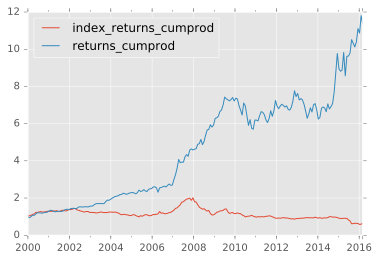

In [5]:
period_returns_sh = pickle.load(open('temp/period_returns_sh.pkl', 'rb'))
plot_data = pandas.DataFrame({'returns': period_returns_sh, 'dates': dates_used})
plot_data['dates'] = pandas.to_datetime(plot_data['dates'])
plot_data = plot_data.set_index('dates')
plot_data['returns'] = plot_data['returns'] + 1
plot_data['returns_cumprod'] = plot_data['returns'].cumprod()
plot_data = plot_data.merge(chsashr_pi, left_index=True, right_index=True)
plot_data['index_returns_cumprod'] = plot_data['index_returns'].cumprod()
plot_data['returns_std'] = plot_data['returns_cumprod'].rolling(window=52, min_periods=52).std()
plot_data['returns_annualized'] = (plot_data['returns_cumprod'] - plot_data['returns_cumprod'].shift(52)) / plot_data['returns_cumprod'].shift(52)
plot_data['index_returns_std'] = plot_data['index_returns_cumprod'].rolling(window=52, min_periods=52).std()
plot_data['index_returns_annualized'] = (plot_data['index_returns_cumprod'] - plot_data['index_returns_cumprod'].shift(52)) / plot_data['index_returns_cumprod'].shift(52)

# plot_data
plot_data[['index_returns_cumprod', 'returns_cumprod']].plot()